In [103]:
import numpy
import matplotlib.pyplot as plt
import math

In [104]:
from net import Net

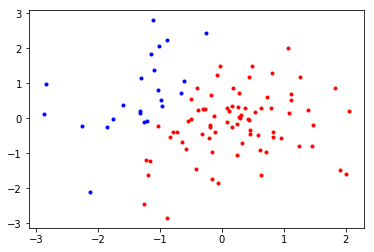

In [105]:
# 生成符合正态分布的初始数据
# batch_size = 100,shape = (2,)
batch_size = 100
x = numpy.random.normal(size=(batch_size,1,1,2))
w0 = numpy.random.normal(size=(2,1))
b0 = numpy.random.normal(size=(1,))
y0 = (numpy.dot(x,w0)+b0 > 0) + 0
# 数据可视化
for i in range(batch_size):
    color = '.r'
    if y0[i] == 0:
        color = '.b'
    plt.plot(x[i,0,0,0],x[i,0,0,1],color)

In [106]:
net = Net()
net.addData(x)
net.addConvLayout([1,1,2,1],bias = True,padding='VAILD',st_func='NONE',init_type='ZERO')
print(net.count()[:,0,0,0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [107]:
# 学习
learning_rate = 0.1
for i in range(1000):
    net.regress(learning_rate,y0)
    if i%100 == 0:
        print(sum(abs(net.count()[:,0,0,0]-y0[:,0,0,0]))/batch_size)# 误差
print(sum(abs(net.count()[:,0,0,0]-y0[:,0,0,0]))/batch_size)# 误差

0.770195358297679
0.7527732020280014
0.7188871618162277
0.6857270136111103
0.6546850224224428
0.6255875686162611
0.5981558928835564
0.5723076924799806
0.5491792329279714
0.5280566995493321
0.5089537038479833


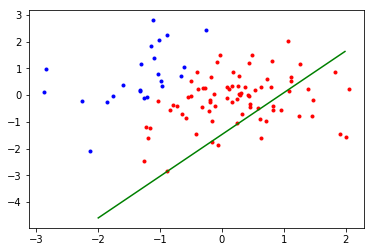

In [108]:
# 绘制结果
for i in range(batch_size):
    color = '.r'
    if y0[i] == 0:
        color = '.b'
    plt.plot(x[i,0,0,0],x[i,0,0,1],color)
x_ = numpy.array(list(range(-200,200)))/100
y = (0.5-(net.conv_filter[0][0,0,0,0]*x_+1*net.conv_bias[0]))/net.conv_filter[0][0,0,1,0]
y = numpy.reshape(y,(400,))
plt.plot(x_,y,'g')